# Car Price Prediction.

In [53]:
## Font Style
BOLD   = "\033[1m"
RESET  = "\033[0m"

RED    = "\033[31m"
GREEN = "\033[32m"
CYAN    = "\033[36m"

# Libraries:-

In [54]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## &emsp; The goal is to create a predictive model which can predict the Price of a Car as per the specifications.

# Data description:-

* <b>Price</b>: The Price of the car in dollars.
* <b>Age</b>: The age of the car in months.
* <b>KM</b>: How many KMS did the car was used.
* <b>FuelType</b>: Petrol/Diesel/CNG car.
* <b>HP</b>: Horse power of the car.
* <b>MetColor</b>: Whether car has metallic color or not.
* <b>Automatic</b>: Whether car has automatic transmission or not.
* <b>CC</b>: The engine size of the car.
* <b>Doors</b>: The number of doors in the car.
* <b>Weight</b>: The weight of the car.

*******************************************
*******************************************

In [55]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

# Reading the dataset & Removing duplicate rows if any:-

In [56]:
# Reading the dataset
CarPricesData= pd.read_csv('C:\\Users\\Pranab_Kumar_Paul\\Desktop\\Python_Script\\M_L_Script\\Data\\Regression_Datasets\\CarPricesData.csv', encoding='latin')

print(BOLD, 'Shape before deleting duplicate values:', CarPricesData.shape, RESET)

# Removing duplicate rows if any
CarPricesData=CarPricesData.drop_duplicates()
print(BOLD, 'Shape After deleting duplicate values:', CarPricesData.shape, RESET)

# Data Backup
DATA_BACKUP= CarPricesData

print(BOLD, 'So this file contains {} Cars details.'.format(len(CarPricesData.index)), RESET)

# Printing sample data
CarPricesData.head(10)

 Shape before deleting duplicate values: (1436, 10) 
 Shape After deleting duplicate values: (1435, 10) 
 So this file contains 1435 Cars details. 


,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0
5,12950,32.0,61000,Diesel,90,0,0,2000.0,3,1170.0
6,16900,27.0,94612,Diesel,90,1,0,2000.0,3,1245.0
7,18600,30.0,75889,Diesel,90,1,0,2000.0,3,1245.0
8,21500,27.0,19700,Petrol,192,0,0,1800.0,3,1185.0
9,12950,23.0,71138,Diesel,69,0,0,1900.0,3,1105.0


# Problem Statement:-

### &emsp; Create a predictive model which can predict the Price of a Car.
&emsp;&emsp;&emsp; <b>Target Variable:</b> Price
<br>
&emsp;&emsp;&emsp; <b>Predictors:</b> Age, KM, FuelType, CC etc.

# Determining the type of Machine Learning:-
&emsp; As per the problem statement I need to create a <b>Supervised ML Regression model</b>, as the target variable is Continuous.

# Looking at the distribution of Target variable:-

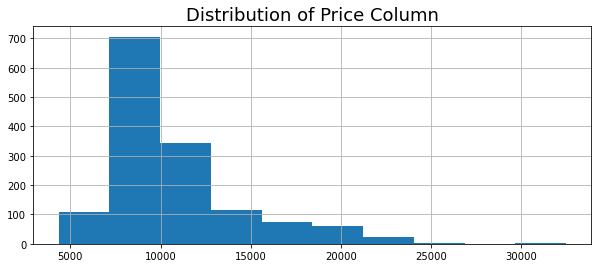

In [57]:
# Inputs.
inpdata= CarPricesData
column_name= 'Price'


# Creating Histogram as the Target variable is Continuous.
%matplotlib inline
inpdata[column_name].hist(figsize = (10,4))
plt.title("Distribution of {} Column".format(column_name) , fontsize = 18, horizontalalignment='center')
plt.show()

#### &emsp;&emsp; The data distribution of the target variable is satisfactory to proceed further.

# Basic Data Exploration:-

In [58]:
# Looking at sample rows in the data
CarPricesData.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0


In [59]:
# Observing data types, Number of Missing values, Total rows etc.
CarPricesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1435 non-null   int64  
 1   Age        1433 non-null   float64
 2   KM         1435 non-null   int64  
 3   FuelType   1431 non-null   object 
 4   HP         1435 non-null   int64  
 5   MetColor   1435 non-null   int64  
 6   Automatic  1435 non-null   int64  
 7   CC         1433 non-null   float64
 8   Doors      1435 non-null   int64  
 9   Weight     1433 non-null   float64
dtypes: float64(3), int64(6), object(1)
memory usage: 123.3+ KB


In [60]:
# Observing Descriptive statistics of the data
CarPricesData.describe(include='all')

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
count,1435.000000,1433.000000,1435.000000,1431,1435.000000,1435.000000,1435.000000,1433.000000,1435.000000,1433.000000
unique,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Petrol,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1260,NaN,NaN,NaN,NaN,NaN,NaN
mean,10720.915679,56.020237,68571.782578,NaN,101.491986,0.674564,0.055749,1566.688765,4.032753,1072.314724
std,3608.732978,18.544948,37491.094553,NaN,14.981408,0.468701,0.229517,186.893360,0.952667,52.283038
min,4350.000000,1.000000,1.000000,NaN,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,NaN,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,NaN,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,NaN,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.000000


In [61]:
# Finding unique values for each column, to get a idea of which column is categorical and which one is Continuous.
CarPricesData.nunique()

Price         236
Age            77
KM           1263
FuelType        3
HP             12
MetColor        2
Automatic       2
CC             12
Doors           4
Weight         59
dtype: int64

# Basic Data Exploration Results:-

Based on the basic exploration above, noting down the observations regarding each column.

The selected columns in this step are not final, further study will be done and then a final list will be created.

* <b> Price     </b> :  Continuous.  Selected. This is the <b>Target Variable!</b>
* <b> Age       </b> :  Continuous.  Selected.
* <b> KM        </b> :  Continuous.  Selected.
* <b> Weight    </b> :  Continuous.  Selected.

* <b> FuelType  </b> :  Categorical.  Selected.
* <b> HP        </b> :  Categorical.  Selected.
* <b> MetColor  </b> :  Categorical.  Selected.
* <b> Automatic </b> :  Categorical.  Selected.
* <b> CC        </b> :  Categorical.  Selected.
* <b> Doors     </b> :  Categorical.  Selected.


# Creating Variable:-

In [62]:
# Target Column
TARGET_COLUMN_NAME= 'Price'

# All Continuous Column
CONTINUOUS_COLUMN_NAMES= ['Age','KM','Weight']

# All Categorical Column
CATEGORICAL_COLUMN_NAMES= ['FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors']

# There are no useless columns to remove.
### &emsp;  All the columns are important in predictive analysis.

# Visual Exploratory Data Analysis:-

### &emsp; 1. Bar Plot for Categorical Predictors: 

In [63]:
# Creating a function which can plot all the Bar Charts at once.
def Plot_Bar_Charts(BAR_inpData, BAR_categorical_columns):    
    %matplotlib inline    
    total_rows = 1    
    try: 
        fig, subPlot=plt.subplots(nrows=total_rows, ncols=int(np.ceil(len(BAR_categorical_columns)/total_rows)),
                                                                                                      figsize=(16,6))    
        fig.suptitle('Bar charts of:- ' + str(BAR_categorical_columns), fontsize = 20)    

        for plotNumber, colName in enumerate(list(BAR_categorical_columns)):
            BAR_inpData.groupby(colName).size().plot(kind='bar',ax= subPlot.flatten()[plotNumber], title=colName, 
                                                                                                 fontsize = 10) #, rot= 0)
    except:
        print('Some thing is #### WRONG ####')

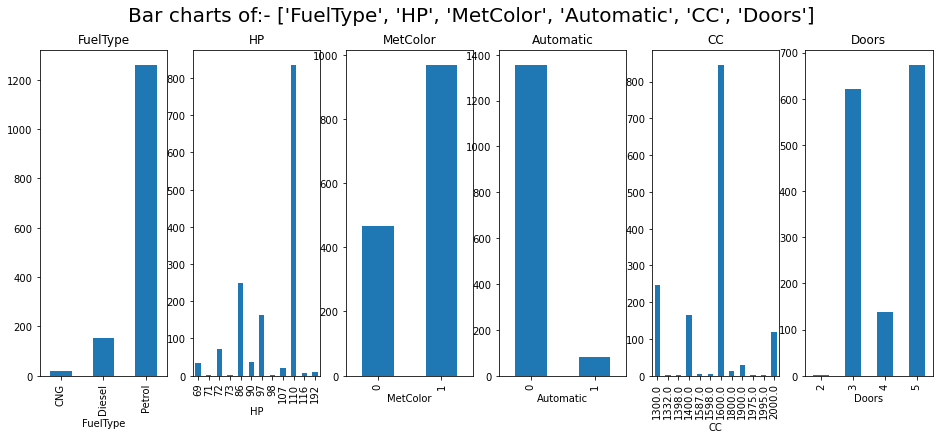

In [64]:
# Calling the function to plot all the Bar Plots at once.
Plot_Bar_Charts(BAR_inpData= CarPricesData, BAR_categorical_columns= CATEGORICAL_COLUMN_NAMES)   

### &emsp; 2. Histogram for Continuous Predictor variables:

In [65]:
# Creating a function which can plot all the Histogram at once.
def plot_hist_charts(HIST_inpdata,HIST_column_name):    
    total_rows= 1
    try:
        HIST_inpdata.hist(column= CONTINUOUS_COLUMN_NAMES, figsize=(15,6), 
                                              layout=(total_rows,int(np.ceil(len(CONTINUOUS_COLUMN_NAMES)/total_rows))))
        plt.suptitle('Histogram of :-'+ str(CONTINUOUS_COLUMN_NAMES), fontsize = 20)
        plt.show()
    except:
        print('Some thing is #### WRONG ####')

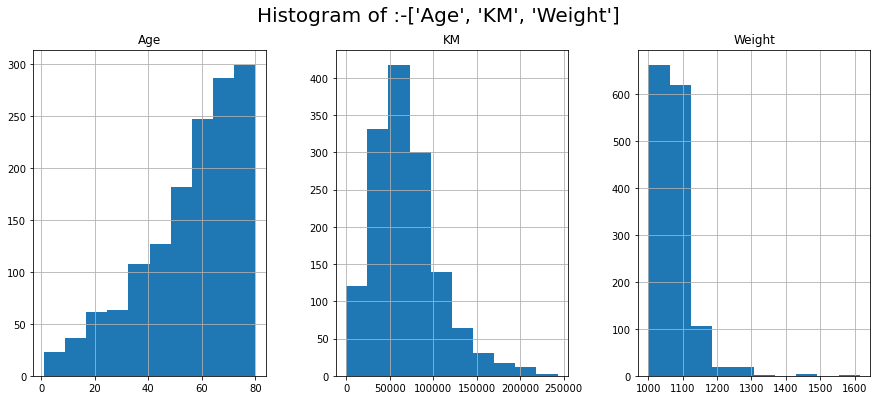

In [66]:
# Calling the function to plot all the Histogram at once.
plot_hist_charts(HIST_inpdata= CarPricesData, HIST_column_name= CONTINUOUS_COLUMN_NAMES)

## &emsp;Histogram Interpretation

* <b>Age</b> : Selected. The distribution is good.
* <b>KM</b>: Selected. The distribution is good.
* <b>Weight</b>: Selected. The distribution is good. Outliers are seen beyond 1300, need to treat them.

# Outlier treatment:-
### &emsp; Replacing outliers for 'Weight'

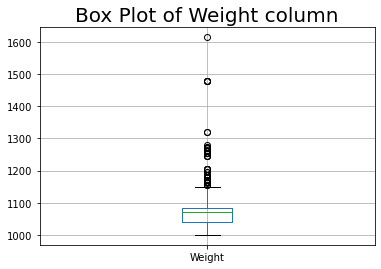

In [67]:
# Inputs.
inpdata= CarPricesData
column_name= 'Weight'

### Box Plot: Checking outliers
#plt.boxplot(CarPricesData['Weight'] ) # , vert=False)
inpdata.boxplot(column= column_name) #, vert=False)
plt.title('Box Plot of {} column'.format(column_name), fontsize = 20)
plt.show()

In [68]:
# Finding logical value near 1300
CarPricesData['Weight'][CarPricesData['Weight']<1400].sort_values(ascending=False)

138     1320.0
112     1320.0
115     1280.0
68      1275.0
119     1275.0
         ...  
690     1000.0
1410    1000.0
957     1000.0
927     1000.0
1000    1000.0
Name: Weight, Length: 1428, dtype: float64

### &emsp; Above result shows the nearest logical value is 1280, hence, replacing any value above 1280 with it.

In [69]:
# Replacing outliers with nearest logical value
CarPricesData['Weight'][CarPricesData['Weight']>1280]=1280

### &emsp; Visualizing distribution after outlier treatment.

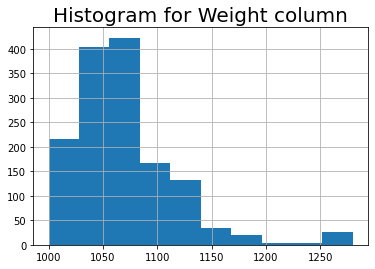

In [70]:
# Inputs.
inpdata= CarPricesData
column_name= 'Weight'

# Histogram for weight after outlier treatment
inpdata[column_name].hist()
plt.title('Histogram for {} column'.format(column_name), fontsize = 20)
plt.show()

The distribution has improved after the outlier treatment.

# Missing values treatment:-

In [71]:
# Finding how many missing values are there for each column
CarPricesData.isnull().sum()

Price        0
Age          2
KM           0
FuelType     4
HP           0
MetColor     0
Automatic    0
CC           2
Doors        0
Weight       2
dtype: int64

### &emsp; I am using Median and Mode value for the missing value replacement.

In [72]:
# Treating missing values of categorical variable with MODE value
CarPricesData['FuelType'].fillna(value=CarPricesData['FuelType'].mode()[0], inplace=True)
CarPricesData['CC'].fillna(value=CarPricesData['CC'].mode()[0], inplace=True)

In [73]:
# Treating missing values of continuous variable with Median value
CarPricesData['Weight'].fillna(value=CarPricesData['Weight'].median(), inplace=True)
CarPricesData['Age'].fillna(value=CarPricesData['Age'].median(), inplace=True)

In [74]:
# Checking missing values again after the treatment
CarPricesData.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

# Feature Selection:-
Select the best columns(Features) which are correlated to the Target variable.
This can be done directly by measuring the correlation values & Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better idea of data.

## &emsp; Relationship exploration: Continuous Vs Continuous -- Scatter Plot:-

#### &emsp;&emsp;&emsp; To see Trend in the Data.

In [75]:
# Creating a function which can plot all the Scatter at once.
def plot_scatter(data,target_variable,continuous_columns):
    
    %matplotlib inline    
    total_rows = 2

    try:        
        fig, axs = plt.subplots(ncols=int(np.ceil(len(continuous_columns)/total_rows)), nrows=total_rows, figsize=(15,12)) 
        fig.suptitle('Scatter Plot of:- ' + str(target_variable) +' vs ' + str(continuous_columns), fontsize = 20) 
        
        for ind , val  in enumerate(continuous_columns):            
            data.plot.scatter(x=val, y=target_variable,  title=val+" VS "+ target_variable, fontsize = 15,  
                                                                                      ax = axs.flatten()[ind])        
        plt.show()
        
    except:
        print('Some thing is #### WRONG ####')

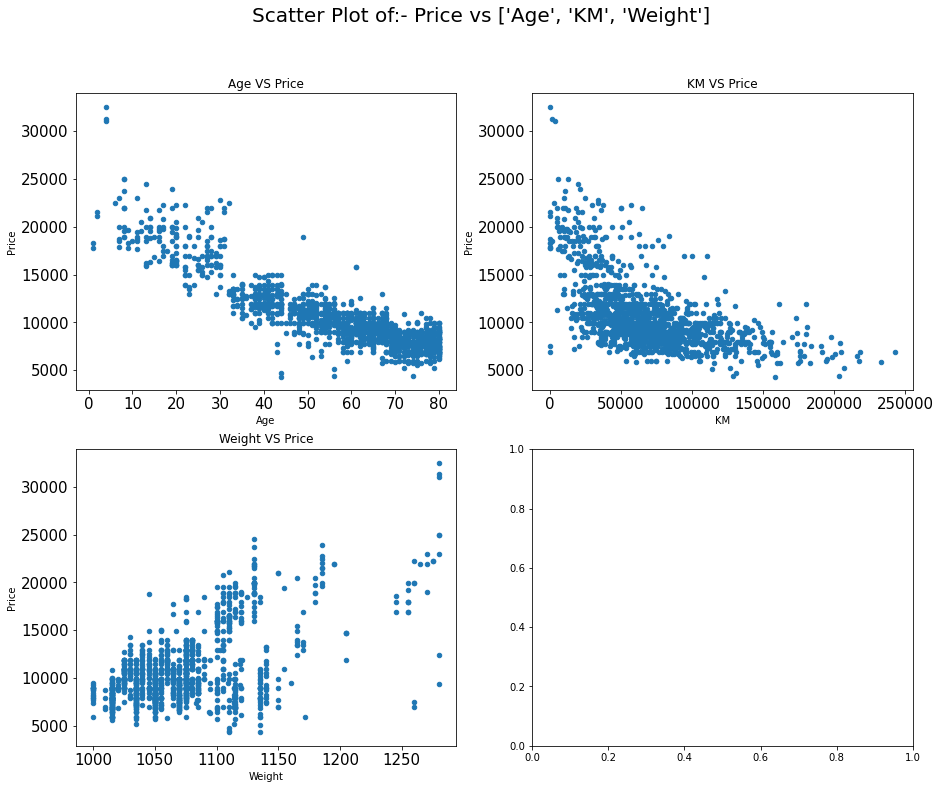

In [76]:
# Calling the function to plot all the Scatter Plot at once.       
plot_scatter(data= CarPricesData, target_variable= TARGET_COLUMN_NAME, continuous_columns= CONTINUOUS_COLUMN_NAMES)

## &emsp; Statistical Feature Selection (Continuous Vs Continuous) using Correlation Matrix:-

In [77]:
# Creating Column list for Correlation Matrix
CORR_CONTINUOUS_COLUMN_NAME = []

CORR_CONTINUOUS_COLUMN_NAME.append(TARGET_COLUMN_NAME)
CORR_CONTINUOUS_COLUMN_NAME = CORR_CONTINUOUS_COLUMN_NAME + CONTINUOUS_COLUMN_NAMES
#CORR_CONTINUOUS_COLUMN_NAME.append(CONTINUOUS_COLUMN_NAMES)

CORR_CONTINUOUS_COLUMN_NAME

['Price', 'Age', 'KM', 'Weight']

In [78]:
# Creating the Correlation Matrix
CorrelationData=CarPricesData[CORR_CONTINUOUS_COLUMN_NAME].corr()
CorrelationData

,Price,Age,KM,Weight
Price,1.000000,-0.874196,-0.569420,0.586103
Age,-0.874196,1.000000,0.502604,-0.490105
KM,-0.569420,0.502604,1.000000,-0.008928
Weight,0.586103,-0.490105,-0.008928,1.000000


In [79]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable

print(CorrelationData['Price'][abs(CorrelationData['Price']) > 0.5 ])

SELECTED_CONTINUOUS_COLUMNS = list((CorrelationData['Price'][abs(CorrelationData['Price']) > 0.5][ 1: ]).keys())
#print('\n\n',BOLD,'Final Selected Continuous Columns:-',RESET,'\n\n',BOLD,'   ****',RESET, SELECTED_CONTINUOUS_COLUMNS)
SELECTED_CONTINUOUS_COLUMNS

Price     1.000000
Age      -0.874196
KM       -0.569420
Weight    0.586103
Name: Price, dtype: float64


['Age', 'KM', 'Weight']

### &emsp; Final selected Continuous columns:-


In [80]:
print('\n\n',BOLD,'    Final Selected Continuous Columns:-\n\n',RESET,'    ',BOLD,'****',RESET,SELECTED_CONTINUOUS_COLUMNS)



      Final Selected Continuous Columns:-

        ****  ['Age', 'KM', 'Weight']


## Relationship exploration: Categorical Vs Continuous -- Box Plots:-

In [81]:
# Creating a function which can plot all the Box Plots at once.
def plot_box_charts(data,target_variable,categorical_columns):
    total_rows= 2
    try:
        fig, PlotCanvas=plt.subplots(nrows=total_rows, ncols=int(np.ceil(len(categorical_columns)/total_rows)), figsize=(17,12))
        fig.suptitle('Box Plot of:- ' )#+ str(target_variable) +' vs ' + str(categorical_columns), fontsize = 20) 
        
        for i, PredictorCol in enumerate(list(categorical_columns)):
            data.boxplot(column=target_variable, by=PredictorCol, vert=True, ax=PlotCanvas.flatten()[i],fontsize= 15)
    except:
        print('')

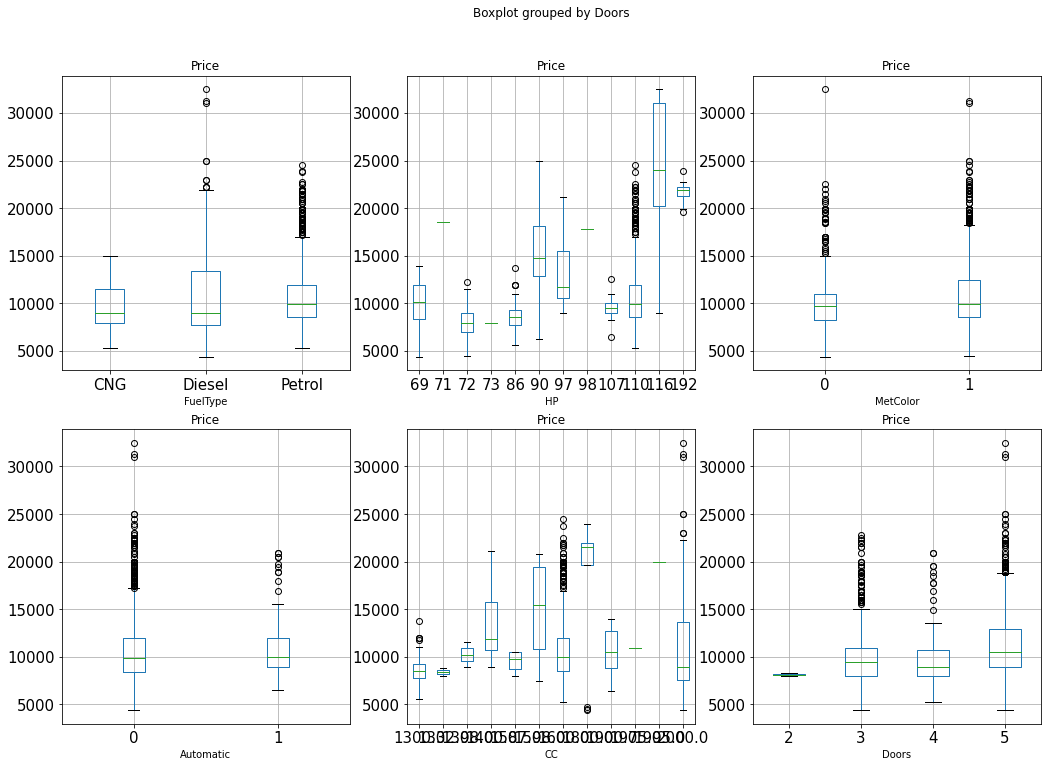

In [82]:
# Calling the function to plot all the Box Plots at once. 
plot_box_charts(data= CarPricesData, target_variable= TARGET_COLUMN_NAME, categorical_columns= CATEGORICAL_COLUMN_NAMES) 

## &emsp; Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test:-

In [83]:
# Defining a function to find the statistical relationship with all the categorical variables

def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print(BOLD, '##### ANOVA Results ##### \n',RESET)
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        if (AnovaResults[1] < 0.05):
            print(BOLD, '**  ',predictor, RESET , GREEN,'is correlated with',RESET, TargetVariable, '||  P-Value:', GREEN,BOLD, AnovaResults[1], RESET)
            SelectedPredictors.append(predictor)
        else:
            print(predictor,  RED,'is NOT correlated with',RESET, TargetVariable, '|| P-Value:',RED,BOLD, AnovaResults[1],RESET)
    print('\n\n',BOLD,'    Final Selected Categorical Columns:-\n\n',RESET,'    ',BOLD,'****',RESET,SelectedPredictors)
    return(SelectedPredictors)

In [84]:
# Calling the function to check which categorical variables are correlated with target variable
SELECTED_CATEGORICAL_COLUMNS= FunctionAnova(inpData= CarPricesData, TargetVariable= TARGET_COLUMN_NAME, 
                                                        CategoricalPredictorList= CATEGORICAL_COLUMN_NAMES)

 ##### ANOVA Results ##### 
 
FuelType  is NOT correlated with  Price || P-Value:   0.07590511356326429 
 **   HP   is correlated with  Price ||  P-Value:   4.403061434008212e-109 
 **   MetColor   is correlated with  Price ||  P-Value:   4.4173957971674025e-05 
Automatic  is NOT correlated with  Price || P-Value:   0.19897717506836016 
 **   CC   is correlated with  Price ||  P-Value:   2.566835080246702e-47 
 **   Doors   is correlated with  Price ||  P-Value:   9.51180734144394e-13 


      Final Selected Categorical Columns:-

        ****  ['HP', 'MetColor', 'CC', 'Doors']


In [85]:
print('Selected',BOLD,'Categorical',RESET,'Columns are:-',BOLD, SELECTED_CATEGORICAL_COLUMNS ,  RESET)
print('Selected',BOLD ,'Continuous',RESET,'Columns are:-', BOLD,  SELECTED_CONTINUOUS_COLUMNS ,  RESET)

Selected  Categorical  Columns are:-  ['HP', 'MetColor', 'CC', 'Doors'] 
Selected  Continuous  Columns are:-  ['Age', 'KM', 'Weight'] 


# Selecting final predictors for Machine Learning:-

In [86]:
SelectedColumns= SELECTED_CONTINUOUS_COLUMNS + SELECTED_CATEGORICAL_COLUMNS
print(BOLD,'\nSelected final predictors for Machine Learning:-',RESET,SelectedColumns)

# Selecting final columns
DataForML=CarPricesData[SelectedColumns]
DataForML.head()

 
Selected final predictors for Machine Learning:-  ['Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors']


,Age,KM,Weight,HP,MetColor,CC,Doors
0,23.0,46986,1165.0,90,1,2000.0,3
1,23.0,72937,1165.0,90,1,2000.0,3
2,24.0,41711,1165.0,90,1,2000.0,3
3,26.0,48000,1165.0,90,0,2000.0,3
4,30.0,38500,1170.0,90,0,2000.0,3


# Saving the final data for reference during deployment:-

In [87]:
DataForML.to_pickle('DataForML.pkl')

# Converting the nominal variable to numeric using get_dummies():-

In [88]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric[TARGET_COLUMN_NAME]=CarPricesData[TARGET_COLUMN_NAME]

# Printing sample rows
DataForML_Numeric.head()

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,23.0,46986,1165.0,90,1,2000.0,3,13500
1,23.0,72937,1165.0,90,1,2000.0,3,13750
2,24.0,41711,1165.0,90,1,2000.0,3,13950
3,26.0,48000,1165.0,90,0,2000.0,3,14950
4,30.0,38500,1170.0,90,0,2000.0,3,13750


# Machine Learning: Splitting the data into Training and Testing sample:-

In [89]:
# Printing all the column names for reference
DataForML_Numeric.columns

Index(['Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors', 'Price'], dtype='object')

In [90]:
# Separate Target Variable and Predictor Variables

TargetVariable=TARGET_COLUMN_NAME
Predictors= SelectedColumns

print('TargetVariable :-', TARGET_COLUMN_NAME)
print('Predictors     :-', Predictors)

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

TargetVariable :- Price
Predictors     :- ['Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors']


# Standardization / Normalization of data:-

In [91]:
### Sandardization of data ###

from sklearn.preprocessing import StandardScaler, MinMaxScaler
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [92]:
# Checking the shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1004, 7)
(1004,)
(431, 7)
(431,)


# Multiple Linear Regression:-

LinearRegression()

  R2 Value:  0.8689314662397682

##### Model Validation and Accuracy Calculations ##########
Mean Accuracy on test data: 90.3687472849226
Median Accuracy on test data: 93.21787709497207

Accuracy values for 10-fold Cross Validation:
 [90.26791724 89.76723088 88.82408428 91.96396823 89.23377738 91.81375365
 91.09330043 87.64071027 90.41172902 88.46171805]

Final Average Accuracy of the model: 89.95


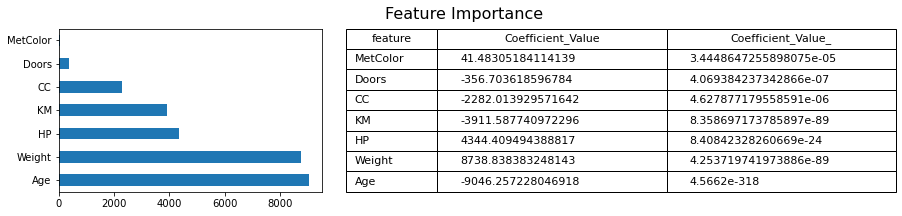

,Price,MLR_Predicted_Price,MLR_APE
0,9950,10329.0,3.809045
1,7995,10311.0,28.968105
2,7500,8950.0,19.333333
3,9950,9321.0,6.321608
4,8950,8749.0,2.245810


In [94]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('\n',BOLD,'R2 Value:', RESET,metrics.r2_score(y_train, LREG.predict(X_train)))

from sklearn.feature_selection import f_regression
fregression=f_regression(X_train, y_train) # p values of features
fregression

####################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=DataForML_Numeric.columns[DataForML_Numeric.columns!=TargetVariable])
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('MLR_Predicted_'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values with other columns.
# print(TestingDataResults[[TargetVariable,'MLR_Predicted_'+TargetVariable]].head())
# print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['MLR_APE']=100 * ((abs(
  TestingDataResults[TargetVariable]-TestingDataResults['MLR_Predicted_'+TargetVariable]))/TestingDataResults[TargetVariable])

MAPE=np.mean(TestingDataResults['MLR_APE'])
MedianMAPE=np.median(TestingDataResults['MLR_APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)

################################################################################
# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))
#TestingDataResults.head()

#################################################################################
#Create Data Frame || column name, Coef & P Value || sorted in Descending order by Coef
feature_importance= pd.DataFrame(data= Predictors, columns=['feature'] )
feature_importance['Coefficient_Value']= LREG.coef_.reshape(int(len(Predictors)/1) , 1 )
feature_importance['Coefficient_Value_']= abs(LREG.coef_.reshape(int(len(Predictors)/1) , 1 ))
feature_importance.index= Predictors

feature_importance['P_Value']= fregression[1].reshape(int(len(Predictors)/1) , 1 )
feature_importance.sort_values('Coefficient_Value_',ascending=False, inplace= True)

# feature importance. Coef & P Value
fig = plt.figure(figsize=(15,3))
fig.suptitle("Feature Importance", fontsize=16,horizontalalignment='center')
  
ax1 = plt.subplot2grid(shape=(1,6), loc=(0, 0), colspan=2)
feature_importance[['feature','Coefficient_Value_']].plot(kind= 'barh', legend= False, ax=ax1)

ax2 = plt.subplot2grid(shape=(1,6), loc=(0,2),colspan=4 ,rowspan=1)
mpl_table= ax2.table(cellText= feature_importance[['feature','Coefficient_Value','P_Value']].values[::-1], bbox= [0, 0, 1, 1],
                                     colLabels= feature_importance.columns, cellLoc= 'left', colWidths= [0.2,0.5,0.5])
mpl_table.set_fontsize(11)
ax2.axis('off')

plt.show()

#################################################################################
MLR_Mean_Accuracy = Accuracy
MLR_Median_Accuracy = MedianAccuracy
MLR_CV_Accuracy = Accuracy_Values.mean()
#print(LR_Mean_Accuracy,LR_Median_Accuracy,LR_CV_Accuracy)

# Printing sample prediction values With the Error
TestingDataResults[[TargetVariable,'MLR_Predicted_'+TargetVariable,'MLR_APE']].head()

# Decision Trees:-

In [43]:
#Finding out Best Parameters of Decision Tree using GridSearchCV.
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

#Decision Tree Parameters
DT_reg_params = {'max_depth': list(range(1,20,1)), "criterion": ['mse', 'friedman_mse', 'mae', 'poisson']}

grid_DT_reg = GridSearchCV(DecisionTreeRegressor(), DT_reg_params, cv = 10)
grid_DT_reg.fit(X , y)

# Finding out best parameters.
DT_reg_1 = grid_DT_reg.best_params_

DT_reg_1

{'criterion': 'mae', 'max_depth': 5}

DecisionTreeRegressor(criterion='mae', max_depth=5)
   **** R2 Value:  0.9006518788192472

##### Model Validation and Accuracy Calculations ##########
Mean Accuracy on test data: 91.58780710482006
Median Accuracy on test data: 93.31103678929766

Accuracy values for 10-fold Cross Validation:
 [83.49125734 89.07857479 86.7660463  87.81577288 87.53810848 92.19854537
 93.26025628 85.29973143 90.88442925 90.6142685 ]

Final Average Accuracy of the model: 88.69


,Price,DT_Predicted_Price,DT_APE
0,9950,9950.0,0.000000
1,7995,9950.0,24.452783
2,7500,7825.0,4.333333
3,9950,7750.0,22.110553
4,8950,8950.0,0.000000


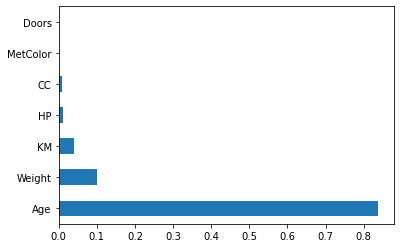

In [161]:
# Decision Trees
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='mae')

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print(BOLD,'  ****','R2 Value:',RESET,metrics.r2_score(y_train, DT.predict(X_train)))

###########################################################################
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
# TestingDataResults=pd.DataFrame(data=X_test, columns=DataForML_Numeric.columns[DataForML_Numeric.columns!=TargetVariable])
# TestingDataResults[TargetVariable]=y_test
TestingDataResults[('DT_Predicted_'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
#print(TestingDataResults[[TargetVariable,'DT_Predicted_'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['DT_APE']=100 * ((abs(
  TestingDataResults[TargetVariable]-TestingDataResults['DT_Predicted_'+TargetVariable]))/TestingDataResults[TargetVariable])

MAPE=np.mean(TestingDataResults['DT_APE'])
MedianMAPE=np.median(TestingDataResults['DT_APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


DT_Mean_Accuracy = Accuracy
DT_Median_Accuracy = MedianAccuracy
DT_CV_Accuracy = Accuracy_Values.mean()
#print(DT_Mean_Accuracy,DT_Median_Accuracy,DT_CV_Accuracy)

# Printing sample prediction values With the Error
TestingDataResults[[TargetVariable,'DT_Predicted_'+TargetVariable,'DT_APE']].head()

# Plotting a Decision Tree:-

In [45]:
# Adding graphviz path to the PATH env variable
import os
os.environ["PATH"] += os.pathsep + 'C:\\Users\\Pranab_Kumar_Paul\\anaconda3\\Library\\bin\\graphviz'

In [46]:
np.var(y_train)

12830860.586795248

In [47]:
np.mean(y_train)

10705.795816733067

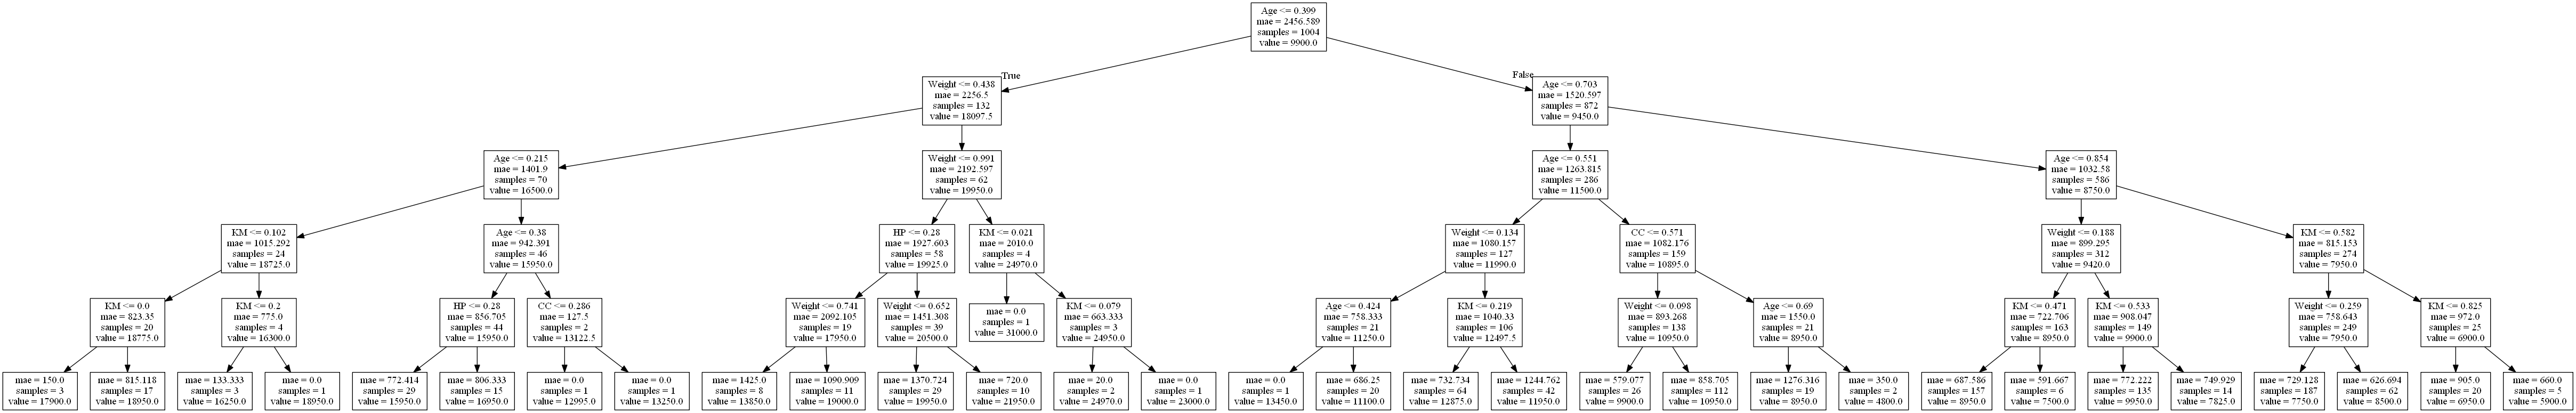

In [48]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None, 
                                feature_names=Predictors, class_names=TargetVariable)

# printing the rules
#print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000,height=2000)

# Random Forest:-

In [51]:
#Finding out Best Parameters of Random Forest using GridSearchCV.
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


#Random Forest Parameters
#RF_reg_params = {'max_depth': list(range(1,20,1)), 'n_estimators': list(range(100,501,1)), "criterion": ['mse', 'mae']}
RF_reg_params = {'max_depth': [5], 'n_estimators': [100,110,150,185,200,225,250,230,270,300,330,350,400,410,450,500,470,170], 
                                                                         "criterion": ['mse', 'mae']}

grid_RF_reg = GridSearchCV(RandomForestRegressor(), RF_reg_params)#, cv = 10)
grid_RF_reg.fit(X , y)

# Finding out best parameters.
RF_reg_1 = grid_RF_reg.best_params_
print(RF_reg_1)

{'criterion': 'mae', 'max_depth': 5, 'n_estimators': 185}


RandomForestRegressor(criterion='mae', max_depth=5, n_estimators=195)
   **** R2 Value:  0.9221235826941233

##### Model Validation and Accuracy Calculations ##########
Mean Accuracy on test data: 91.92614827880746
Median Accuracy on test data: 93.76536312849161

 Accuracy values for 10-fold Cross Validation: 
 [83.15201728 89.36542715 89.1723487  89.60935601 87.57419936 91.78832532
 93.23967698 86.7386862  91.48642953 90.21257177]

 Final Average Accuracy of the model: 89.23


,Price,RF_Predicted_Price,RF_APE
0,9950,9830.0,1.206030
1,7995,9882.0,23.602251
2,7500,8449.0,12.653333
3,9950,8109.0,18.502513
4,8950,8974.0,0.268156


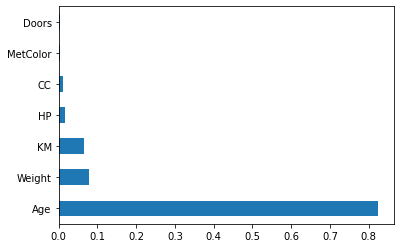

In [162]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=5, n_estimators= 195 ,criterion='mae')

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print(BOLD,'  **** R2 Value:',RESET,metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
# TestingDataResults=pd.DataFrame(data=X_test, columns=DataForML_Numeric.columns[DataForML_Numeric.columns!=TargetVariable])
# TestingDataResults[TargetVariable]=y_test
TestingDataResults[('RF_Predicted_'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
#print(TestingDataResults[[TargetVariable,'RF_Predicted_'+TargetVariable]].head())

###########################################################################
# Calculating the error for each row
TestingDataResults['RF_APE']=100 * ((abs(
  TestingDataResults[TargetVariable]-TestingDataResults['RF_Predicted_'+TargetVariable]))/TestingDataResults[TargetVariable])

MAPE=np.mean(TestingDataResults['RF_APE'])
MedianMAPE=np.median(TestingDataResults['RF_APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\n Accuracy values for 10-fold Cross Validation: \n',Accuracy_Values)
print('\n Final Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

RF_Mean_Accuracy = Accuracy
RF_Median_Accuracy = MedianAccuracy
RF_CV_Accuracy = Accuracy_Values.mean()
#print(RF_Mean_Accuracy,RF_Median_Accuracy,RF_CV_Accuracy)

# Printing sample prediction values With the Error
TestingDataResults[[TargetVariable,'RF_Predicted_'+TargetVariable,'RF_APE']].head()

# Plotting one of the Decision Trees in Random Forest:-

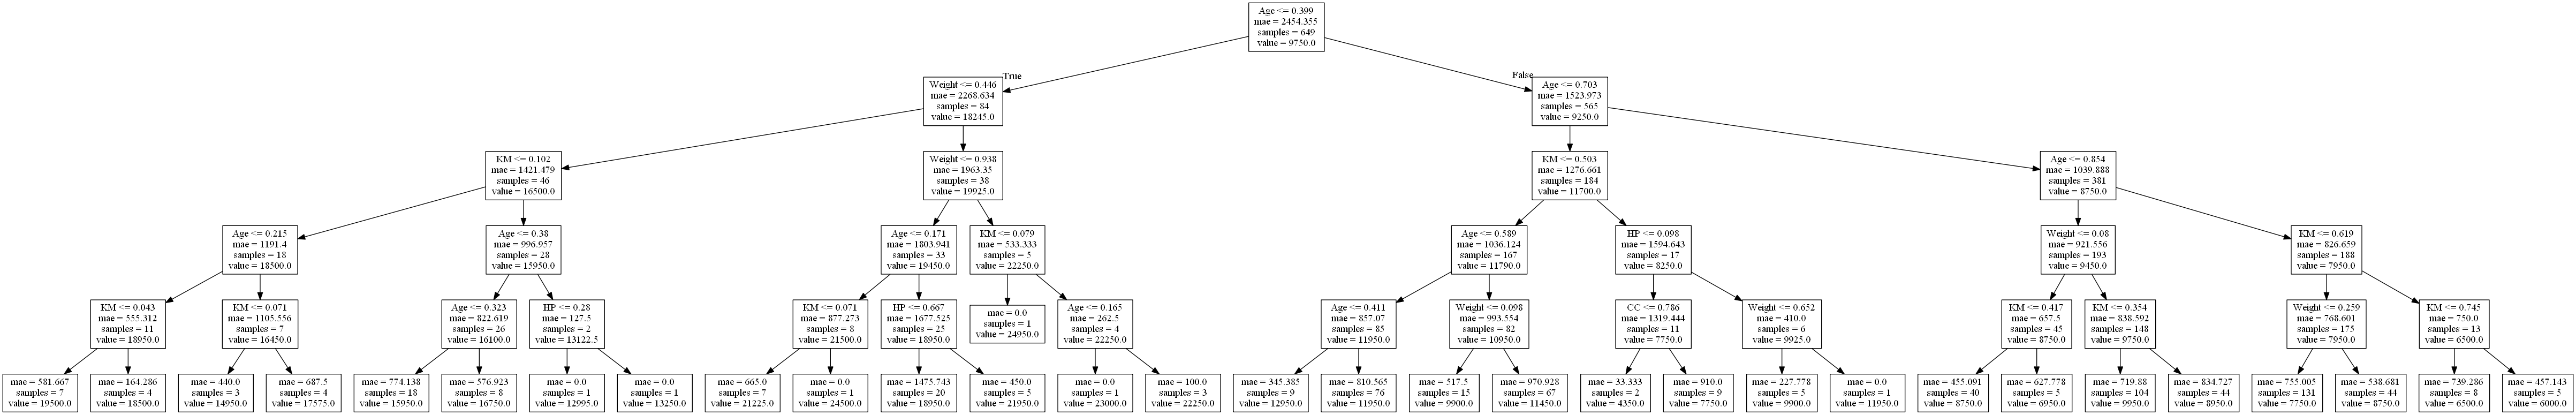

In [50]:
# Plotting a single Decision Tree from Random Forest
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data for the 6th Decision Tree in Random Forest
dot_data = tree.export_graphviz(RegModel.estimators_[10] , out_file=None, feature_names=Predictors, class_names=TargetVariable)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000,height=2000)

# AdaBoost:-

In [54]:
#Finding out Best Parameters of AdaBoost using GridSearchCV.
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

#Random Forest Parameters
DTR2=DecisionTreeRegressor(max_depth=2)
DTR3=DecisionTreeRegressor(max_depth=3)
DTR4=DecisionTreeRegressor(max_depth=4)
DTR5=DecisionTreeRegressor(max_depth=5)
DTR6=DecisionTreeRegressor(max_depth=6)
DTR7=DecisionTreeRegressor(max_depth=7)
DTR8=DecisionTreeRegressor(max_depth=8)
DTR9=DecisionTreeRegressor(max_depth=9)
DTR10=DecisionTreeRegressor(max_depth=10)

AB_reg_params = {'learning_rate': [0.1,0.2,0.3,0.4,0.5],'base_estimator':[DTR2, DTR3, DTR4, DTR5, DTR6, DTR7, DTR8, DTR9,DTR10] 
                 ,'n_estimators': [100,110,150,185,200,225,250,230,270,300,330,350,400,410,450,500,470,170]}

grid_AB_reg = GridSearchCV(AdaBoostRegressor(), AB_reg_params)#, cv = 10)
grid_AB_reg.fit(X , y)

# Finding out best parameters.
AB_reg_1 = grid_AB_reg.best_params_
print(AB_reg_1)

{'base_estimator': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best'), 'learning_rate': 0.1, 'n_estimators': 100}


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=5),
                  learning_rate=0.1, n_estimators=100)
    **** R2 Value:  0.9360168003824099

##### Model Validation and Accuracy Calculations ##########
Mean Accuracy on test data: 91.65167848401693
Median Accuracy on test data: 93.68205128205128

Accuracy values for 10-fold Cross Validation:
 [84.26569439 89.83200339 89.12113701 89.7684756  90.36743546 91.27796389
 92.70716516 87.33144967 91.20232398 90.46240786]

Final Average Accuracy of the model: 89.63


,Price,AB_Predicted_Price,AB_APE
0,9950,9803.0,1.477387
1,7995,9819.0,22.814259
2,7500,7950.0,6.000000
3,9950,8305.0,16.532663
4,8950,9057.0,1.195531


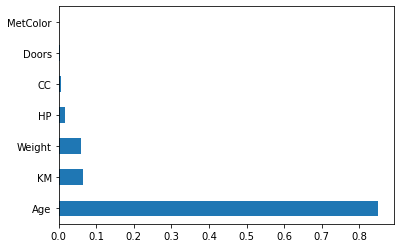

In [163]:
# Adaboost
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 5 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=5)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.1)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print(BOLD,'   **** R2 Value:',RESET,metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
# TestingDataResults=pd.DataFrame(data=X_test, columns=DataForML_Numeric.columns[DataForML_Numeric.columns!=TargetVariable])
# TestingDataResults[TargetVariable]=y_test
TestingDataResults[('AB_Predicted_'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
#print(TestingDataResults[[TargetVariable,'AB_Predicted_'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['AB_APE']=100 * ((abs(
  TestingDataResults[TargetVariable]-TestingDataResults['AB_Predicted_'+TargetVariable]))/TestingDataResults[TargetVariable])

MAPE=np.mean(TestingDataResults['AB_APE'])
MedianMAPE=np.median(TestingDataResults['AB_APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

AB_Mean_Accuracy = Accuracy
AB_Median_Accuracy = MedianAccuracy
AB_CV_Accuracy = Accuracy_Values.mean()
#print(AB_Mean_Accuracy,AB_Median_Accuracy,AB_CV_Accuracy)

TestingDataResults[[TargetVariable,'AB_Predicted_'+TargetVariable,'AB_APE']].head()

# Plotting one of the Decision trees from Adaboost:-

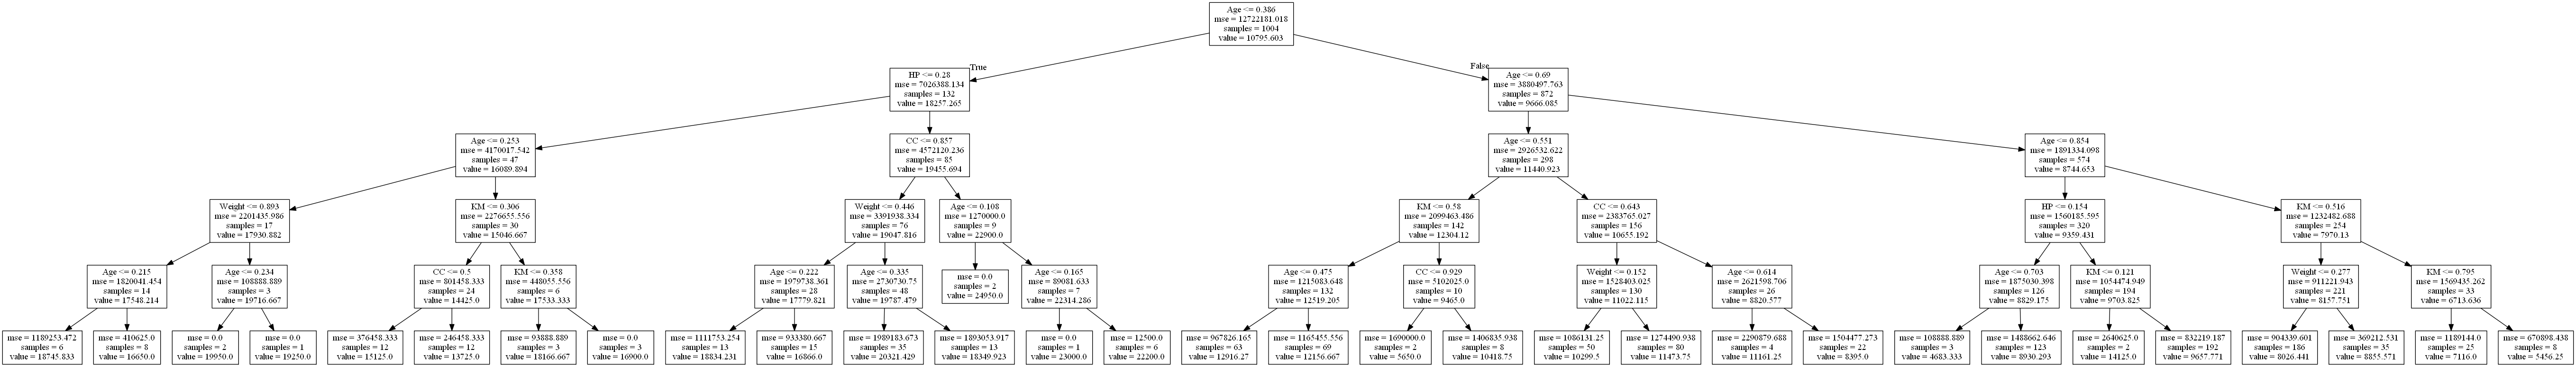

In [53]:
# PLotting 5th single Decision Tree from Adaboost
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data for the 6th Decision Tree in Random Forest
dot_data = tree.export_graphviz(RegModel.estimators_[5] , out_file=None, feature_names=Predictors, class_names=TargetVariable)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=5000,height=5000)

In [57]:
# Installing xgboost library
#!pip install xgboost

# XGBoost:-

In [1]:
#Finding out Best Parameters of XGBoost using GridSearchCV.
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

#Random Forest Parameters
XGB_reg_params = {'max_depth': list(range(1,20,1)),'learning_rate': [0.1,0.2,0.3,0.4,0.5], 
                  'n_estimators':[100,110,150,185,200,225,250,230,270,300,330,350,400,410,450,500,470,170],
                 'objective': ['reg:linear','reg:squarederror'], "booster": ['gbtree']}

grid_XGB_reg = GridSearchCV(XGBRegressor(), XGB_reg_params)#, cv = 2)
grid_XGB_reg.fit(X , y)

# Finding out best parameters.
XGB_reg_1 = grid_XGB_reg.best_params_

In [59]:
print(XGB_reg_1)

{'booster': 'gbtree', 'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 470, 'objective': 'reg:linear'}


XGBRegressor(base_score=None, booster='gbtree', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.2, max_delta_step=None, max_depth=2,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=470, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)
 
    **** R2 Value:  0.9642780426001311

##### Model Validation and Accuracy Calculations ##########
Mean Accuracy on test data: 91.72139529020694
Median Accuracy on test data: 93.54545454545455

Accuracy values for 10-fold Cross Validation:
 [83.43677123 90.23878125 91.54304965 91.28458905 90.24596971 92.42564076
 92.26318613 89.6395952  91.30043853 90.67652093]

Final Ave

,Price,XB_Predicted_Price,XB_APE
0,9950,10184.0,2.351759
1,7995,9879.0,23.564728
2,7500,7919.0,5.586667
3,9950,8466.0,14.914573
4,8950,8331.0,6.916201


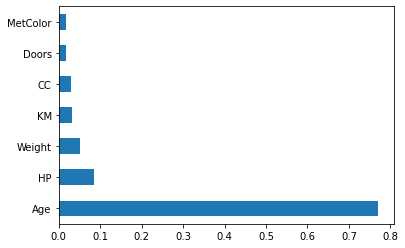

In [165]:
# Xtreme Gradient Boosting
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2, 
                      learning_rate=0.2, n_estimators=470, objective='reg:squarederror', booster='gbtree') 
                                                         # objective='reg:linear', reg:squarederror

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print(BOLD,'\n    **** R2 Value:',RESET,metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
# TestingDataResults=pd.DataFrame(data=X_test, columns=DataForML_Numeric.columns[DataForML_Numeric.columns!=TargetVariable])
# TestingDataResults[TargetVariable]=y_test
TestingDataResults[('XB_Predicted_'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
#print(TestingDataResults[[TargetVariable,'XB_Predicted_'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['XB_APE']=100 * ((abs(
  TestingDataResults[TargetVariable]-TestingDataResults['XB_Predicted_'+TargetVariable]))/TestingDataResults[TargetVariable])


MAPE=np.mean(TestingDataResults['XB_APE'])
MedianMAPE=np.median(TestingDataResults['XB_APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) 
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


XB_Mean_Accuracy = Accuracy
XB_Median_Accuracy = MedianAccuracy
XB_CV_Accuracy = Accuracy_Values.mean()
#print(XB_Mean_Accuracy,XB_Median_Accuracy,XB_CV_Accuracy)

TestingDataResults[[TargetVariable,'XB_Predicted_'+TargetVariable,'XB_APE']].head()

# Plotting a single Decision tree out of XGBoost:-

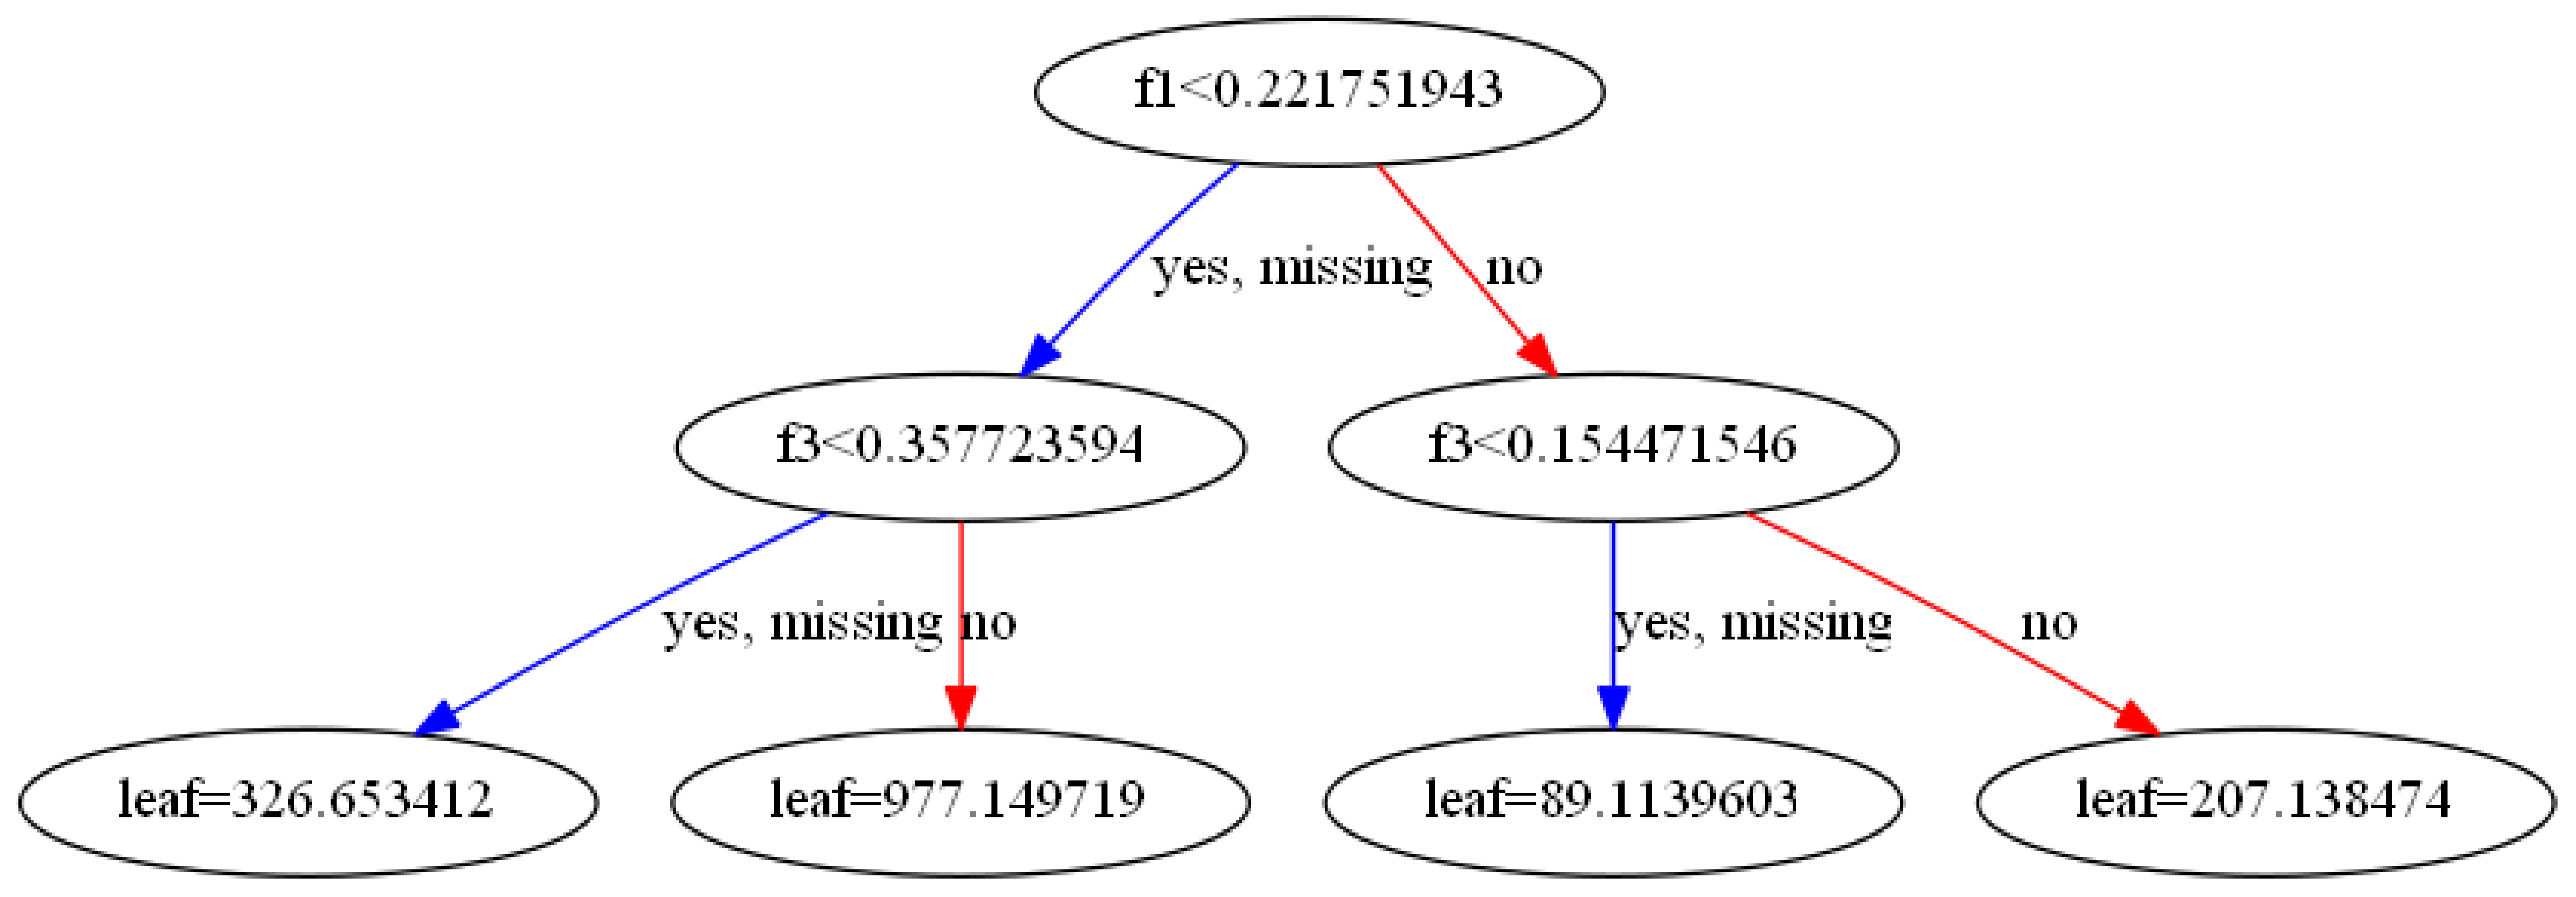

In [55]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(100, 40))
plot_tree(XGB, num_trees=10, ax=ax)
plt.show()

# KNN:-

In [56]:
#Finding out Best N_Neighbors value of KNN using GridSearchCV.
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

KNN_params = {'n_neighbors': list(range(1,10,1))}

grid_KNN_reg = GridSearchCV(KNeighborsRegressor(), KNN_params, cv = 10)
grid_KNN_reg.fit( X , y)

# Finding out best parameters.
KNN_reg_1 = grid_KNN_reg.best_params_
KNN_reg_1

{'n_neighbors': 9}

In [166]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=9)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print(BOLD,'    **** R2 Value:',RESET,metrics.r2_score(y_train, KNN.predict(X_train)))


###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
# TestingDataResults=pd.DataFrame(data=X_test, columns=DataForML_Numeric.columns[DataForML_Numeric.columns!=TargetVariable])
# TestingDataResults[TargetVariable]=y_test
TestingDataResults[('KNN_Predicted_'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
#print(TestingDataResults[[TargetVariable,'KNN_Predicted_'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['KNN_APE']=100 * ((abs(
  TestingDataResults[TargetVariable]-TestingDataResults['KNN_Predicted_'+TargetVariable]))/TestingDataResults[TargetVariable])

MAPE=np.mean(TestingDataResults['KNN_APE'])
MedianMAPE=np.median(TestingDataResults['KNN_APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) 
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


KNN_Mean_Accuracy = Accuracy
KNN_Median_Accuracy = MedianAccuracy
KNN_CV_Accuracy = Accuracy_Values.mean()
#print(KNN_Mean_Accuracy,KNN_Median_Accuracy,KNN_CV_Accuracy)

TestingDataResults[[TargetVariable,'KNN_Predicted_'+TargetVariable,'KNN_APE']].head()

KNeighborsRegressor(n_neighbors=9)
     **** R2 Value:  0.8879004832715305

##### Model Validation and Accuracy Calculations ##########
Mean Accuracy on test data: 90.4500808503493
Median Accuracy on test data: 92.78297872340426

Accuracy values for 10-fold Cross Validation:
 [78.93264563 88.41579794 91.1382566  89.42825374 89.28963902 91.13307937
 91.38111568 84.84135689 89.86841101 87.76052977]

Final Average Accuracy of the model: 88.22


,Price,KNN_Predicted_Price,KNN_APE
0,9950,9538.0,4.140704
1,7995,9788.0,22.426517
2,7500,7844.0,4.586667
3,9950,9049.0,9.055276
4,8950,8700.0,2.793296


# Best Model For Deployment:-

In [167]:
TestingDataResults[[TargetVariable,'MLR_Predicted_'+TargetVariable,'MLR_APE', 'DT_Predicted_'+TargetVariable,'DT_APE', 'RF_Predicted_'+TargetVariable,'RF_APE','AB_Predicted_'+TargetVariable,'AB_APE', 'XB_Predicted_'+TargetVariable,'XB_APE', 'KNN_Predicted_'+TargetVariable,'KNN_APE']].head()

,Price,MLR_Predicted_Price,MLR_APE,DT_Predicted_Price,DT_APE,RF_Predicted_Price,RF_APE,AB_Predicted_Price,AB_APE,XB_Predicted_Price,XB_APE,KNN_Predicted_Price,KNN_APE
0,9950,10329.0,3.809045,9950.0,0.000000,9830.0,1.206030,9803.0,1.477387,10184.0,2.351759,9538.0,4.140704
1,7995,10311.0,28.968105,9950.0,24.452783,9882.0,23.602251,9819.0,22.814259,9879.0,23.564728,9788.0,22.426517
2,7500,8950.0,19.333333,7825.0,4.333333,8449.0,12.653333,7950.0,6.000000,7919.0,5.586667,7844.0,4.586667
3,9950,9321.0,6.321608,7750.0,22.110553,8109.0,18.502513,8305.0,16.532663,8466.0,14.914573,9049.0,9.055276
4,8950,8749.0,2.245810,8950.0,0.000000,8974.0,0.268156,9057.0,1.195531,8331.0,6.916201,8700.0,2.793296


In [168]:
best_model = pd.DataFrame()

best_model['Model_Name'] = ['Multiple_Linear_Regression', 'Decision_Trees', 'Random_Forest', 'AdaBoost', 'XGBoost', 'KNN']
best_model['Mean_Accuracy'] = [MLR_Mean_Accuracy, DT_Mean_Accuracy, RF_Mean_Accuracy, AB_Mean_Accuracy, XB_Mean_Accuracy, KNN_Mean_Accuracy]
best_model['Median_Accuracy'] = [MLR_Median_Accuracy, DT_Median_Accuracy, RF_Median_Accuracy, AB_Median_Accuracy, XB_Median_Accuracy, KNN_Median_Accuracy]
best_model['CV_Accuracy'] = [MLR_CV_Accuracy, DT_CV_Accuracy, RF_CV_Accuracy, AB_CV_Accuracy, XB_CV_Accuracy, KNN_CV_Accuracy]
print(best_model)

print('\n\nPer', BOLD, 'Mean Accuracy',RESET, 'Best Model Is', BOLD ,CYAN , best_model.loc[best_model['Mean_Accuracy'].idxmax(), 'Model_Name'],'(',best_model.loc[best_model['Mean_Accuracy'].idxmax(), 'Mean_Accuracy'],').',RESET)
print('Per', BOLD, 'Median Accuracy',RESET, ' Best Model Is', BOLD , CYAN , best_model.loc[best_model['Median_Accuracy'].idxmax(), 'Model_Name'],'(',best_model.loc[best_model['Median_Accuracy'].idxmax(), 'Median_Accuracy'],').',RESET)
print('Per', BOLD, 'Cross Validation Accuracy',RESET, ' Best Model Is', BOLD ,RED , best_model.loc[best_model['CV_Accuracy'].idxmax(), 'Model_Name'],'(',best_model.loc[best_model['CV_Accuracy'].idxmax(), 'CV_Accuracy'],').',RESET)

                   Model_Name  Mean_Accuracy  Median_Accuracy  CV_Accuracy
0  Multiple_Linear_Regression      90.368747        93.217877    89.947819
1              Decision_Trees      91.587807        93.311037    88.694699
2               Random_Forest      91.926148        93.765363    89.233904
3                    AdaBoost      91.651678        93.682051    89.633606
4                     XGBoost      91.721395        93.545455    90.305454
5                         KNN      90.450081        92.782979    88.218909


Per  Mean Accuracy  Best Model Is   Random_Forest ( 91.92614827880746 ). 
Per  Median Accuracy   Best Model Is   Random_Forest ( 93.76536312849161 ). 
Per  Cross Validation Accuracy   Best Model Is   XGBoost ( 90.30545424518441 ). 


# Deployment of the Model:-
###  &emsp;    &emsp;  Based on the above trials,  - XGBOOST - algorithm produces the best average accuracy. Hence, I am choosing - XGBOOST - as the final model.

### Choosing only the most important variables:-

<b>'Age', 'KM', 'Weight'</b> These are consistently on top of the variable importance chart for every algorithm. Hence choosing these as final set of predictor variables.

In [169]:
# Separate Target Variable and Predictor Variables
TargetVariable='Price'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['Age', 'KM', 'Weight']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(1435, 3)
(1435,)


# &emsp;  Step 1. Retraining the model using 100% data & selected Predictors:-

In [170]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=5, learning_rate=0.1, n_estimators=100, objective='reg:squarederror', booster='gbtree')

# Running 10-Fold Cross validation on a given algorithm
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [84.79864687 90.23273839 89.45070031 91.08706325 90.35462307 92.62984465
 92.4657869  87.67017758 91.91076957 90.66414233]

Final Average Accuracy of the model: 90.13


### &emsp; &emsp; Find out the best Parameters for the selected model using GridSearchCV:-

In [70]:
from sklearn.model_selection import GridSearchCV

#XGBoost
XGB_params = {'max_depth': list(range(1,20,1)), "learning_rate":[0.1,0.2, 0.3],'n_estimators':[100,110,150,185,200,225,250,230,270,300,330,350,400,410,450,500,470,170],
              'n_estimators':list(range(1,100,1)),'objective':['reg:squarederror'], 'booster':['gbtree']}


grid_XGB_reg = GridSearchCV(XGBRegressor(), XGB_params, cv = 10)
grid_XGB_reg.fit( X , y)

# Best parameters.
XGB_reg_1 = grid_XGB_reg.best_params_
print(XGB_reg_1)

{'booster': 'gbtree', 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 53, 'objective': 'reg:squarederror'}


### &emsp; &emsp; Best Parameters For the selected model is:- <br><br>  &emsp; &emsp; {'booster': 'gbtree', 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 53, 'objective': 'reg:squarederror'}

## &emsp; &emsp; Retraining the model with Best Parameters.

In [171]:
# Using final hyperparameters
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=4, 
                      learning_rate=0.2, 
                      n_estimators=53, 
                      objective='reg:squarederror', 
                      booster='gbtree')
# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(X,y)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [84.83079239 91.17028167 90.13411956 91.20350637 89.69928759 92.36703988
 92.77854069 89.20697841 91.64974191 90.31272732]

Final Average Accuracy of the model: 90.34


# &emsp; Step 2. Save the model as a serialized file which can be stored anywhere:-

In [172]:
import pickle
import os

with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\Pranab_Kumar_Paul\Desktop\Python_Script\My_Script\Python_Project(GitHub)\Regression


# &emsp;  Step 3. Create a python function:-

In [173]:
# This Function can be called from any from any front end tool/website
def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputData=InputData.append(DataForML)
    
    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)
            
    # Maintaining the same order of columns as it was during the model training
    Predictors=['Age', 'KM', 'Weight']
    
    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        fileReadStream.close()
            
    # GenPrice Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(round(PredictionResult))

In [174]:
# Calling the function for some new data
NewSampleData=pd.DataFrame(
data=[[23,46986,1165],
     [30,38500,1170.0]],
columns=['Age', 'KM', 'Weight'])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData= NewSampleData)

   Age     KM  Weight
0   23  46986  1165.0
1   30  38500  1170.0


,Prediction
0,14886.0
1,15295.0


# &emsp; Step 4. Deploying a predictive model as an API:-
### Creating the model with few parameters
### - Function for predictions API

In [175]:
# Creating the function which can take inputs and return predictions
def FunctionGeneratePrediction(inp_Age, inp_KM, inp_Weight):
    
    # Creating a data frame for the model input
    SampleInputData=pd.DataFrame(
     data=[[inp_Age, inp_KM, inp_Weight]],
     columns=['Age', 'KM', 'Weight'])

    # Calling the function defined above using the input parameters
    Predictions=FunctionPredictResult(InputData= SampleInputData)

    # Returning the predicted loan status
    return(Predictions.to_json())

# Function call
FunctionGeneratePrediction(inp_Age=65, 
                           inp_KM=46986, 
                           inp_Weight=1165
                             )

'{"Prediction":{"0":10182.0}}'

# Creating Flask API:-

In [176]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

In [177]:
app = Flask(__name__)

@app.route('/prediction_api', methods=["GET"])
def prediction_api():
    try:
        # Getting the paramters from API call
        Age_value=float(request.args.get('Age'))
        KM_value=float(request.args.get('KM'))
        Weight_value=float(request.args.get('Weight'))
                
        # Calling the funtion to get predictions
        prediction_from_api=FunctionGeneratePrediction(
                                                       inp_Age = Age_value, 
                                                       inp_KM =  KM_value, 
                                                       inp_Weight = Weight_value
                                                        )

        return (prediction_from_api)
    
    except Exception as e:
        return('Something is not right!:'+str(e))

# Starting the API engine:-

In [178]:
import os
if __name__ =="__main__":
    
    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=8080, threaded=True, debug=True, use_reloader=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:8080/ (Press CTRL+C to quit)
127.0.0.1 - - [14/Jun/2021 06:58:58] "GET /prediction_api?Age=65&KM=40000&Weight=1100 HTTP/1.1" 200 -
127.0.0.1 - - [14/Jun/2021 06:59:11] "GET /prediction_api?Age=65&KM=40000&Weight=11000000000000000000000000000000000000000000000000000000000000000000000 HTTP/1.1" 200 -


# Sample URL to call the API:-

#### Copy and paste below URL in the web browser
http://127.0.0.1:8080/prediction_api?Age=65&KM=40000&Weight=1100

&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp;&emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp;&emsp; &emsp;&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Pranab Kumar Paul.